# Machine Learning

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("base_datos_2008.csv", nrows = 100000)

# Suprimo los datos faltantes de las columnas que nos interesa observar.
df = df[["ArrDelay", "DepDelay", "Distance", "AirTime"]].dropna()

In [4]:
df.head()

,ArrDelay,DepDelay,Distance,AirTime
0,-14.0,8.0,810,116.0
1,2.0,19.0,810,113.0
2,14.0,8.0,515,76.0
3,-6.0,-4.0,515,78.0
4,34.0,34.0,515,77.0


In [2]:
# Vamos a normalizar todas las variables para que estén dentro de una misma escala.
X_scaled = preprocessing.scale(df)
X_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [3]:
# Calculamos la media de cada una de las columnas, prácticamente es 0.
X_scaled.mean(axis = 0)

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [8]:
# Hacemos lo mismo con desviación estándar. Todas las variables están centradas en el 0 con una desviación estándar = 1.
X_scaled.std(axis = 0)

array([1., 1., 1., 1.])

In [9]:
# Si no tenemos una distribución de los datos el retraso en la salida 8 frente a la llegada 14 ¿cuánto es? Si no tenemos
# un escalado de los datos no se puede saber.
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [10]:
# Valor por encima de la media el primero, el tercero y cuarto por debajo de la media.
X_scaled[2]

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

In [11]:
# Vamos a realizar otro tipo de escalado de datos, aplicamos MinMax.
# Los datos ya no están centrados en 0, explicitamos el rango de valores que queremos que tenga.
min_max_scaler = preprocessing.MinMaxScaler([0,10])
# Adapta los datos atendiendo a nuestro dataframe
X_train_minmax = min_max_scaler.fit_transform(df)
X_train_minmax
# Hay que tener en cuenta los outliers si son muchos, en este caso quedarían fuera de la distribución.

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

Los datos en este caso ya no están centrados en el cero y tienen otra escala.

# Clustering

https://scikit-learn.org/stable/modules/clustering.html#k-means 

El objetivo del clustering es separar una población en grupos asegurando que cada uno de ellos tenga la misma varianza. Genera conjuntos disjuntos, asignando cada punto al centroide más cercano.

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv", nrows = 1e5)
newdf = df[["AirTime", "DepDelay"]].dropna()

In [13]:
# Número de clusters = 4, añado una semilla con random_state y utilizo todos los procesadores del portátil.
# Ajusto el modelo con fit.
kmeans = KMeans(n_clusters = 4, random_state = 0, n_jobs = -1).fit(newdf)
kmeans.labels_

# Obtenemos el cluster al que pertenecen cada una de nuestras observaciones.

C:\Users\gabriel.marin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([3, 3, 1, ..., 0, 3, 3])

In [14]:
# Con la siguiente instrucción analizamos cómo han quedado distribuidos los individuos en cada uno de los grupos.
np.unique(kmeans.labels_, return_counts = True)
# Como se puede observar han quedado distribuidos de manera muy dispar, 3944 al primer grupo,...

(array([0, 1, 2, 3]), array([ 3944, 60402,  8274, 26078], dtype=int64))

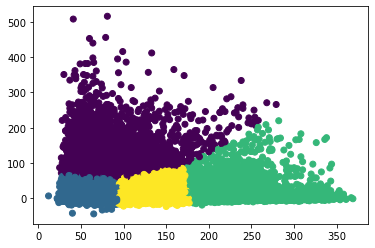

In [15]:
# Vamos a visualizar cómo quedan distribuidos los centroides.
import matplotlib.pyplot as plt
plt.scatter(newdf["AirTime"], newdf["DepDelay"], c= kmeans.labels_)
plt.show()

Se puede observar que hay dos grupos a la izquierda muy cargados y próximos, y otros dos con mucha dispersión.

In [16]:
# Vamos a ver dónde quedan situados los centroides.
kmeans.cluster_centers_

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

In [17]:
# Si queremos utilizar nuestro objeto kmeans para predecir a qué cluster van a pertenecer nuevos puntos.

alldf = pd.read_csv("base_datos_2008.csv", nrows = 1e6)[["AirTime", "DepDelay"]].dropna()

In [18]:
# Vamos a mostrar cómo quedan clasificados los primeros 50
kmeans.predict(alldf)[0:100]

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2])

Si probamos con un clúster de 10...

# Regresión Lineal

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

El objetivo de este modelo es aproximar a una recta el conjunto de datos. € (error del modelo).
- Es necesario que la relación entre las variables sea lineal.
- Las variables explicativas no tienen relación entre ellas.
- Homocedasticidad (varianza constante, si predecimos los salarios en base a la edad, habría que encontrar los mismos errores para gente joven que para gente mayor).
- El error total sea la suma de todos los errores.

Y se corresponde con la variable independiente y X corresponde con las variables explicativas o regresoras.

Y = $\beta_0$ +  $\beta_1$ $X_1$ +  $\beta_2$ $X_2$ +  $\beta_3$ $X_3$ + .... + €

In [24]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
# Seleccionamos un subconjunto de 100.000 líneas que vamos a mezclar.
df = df.sample(frac = 1).head(100000)
# Vamos a determinar predecir el retraso en la llegada ArrDelay a partir del retraso en la salida DepDelay
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [25]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [26]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes.
print("Coeficientes: ", regr.coef_)

# El valor próximo a 1 nos indica que está cercano a la varianza, desviación al cuadrado respecto a la media.
# Estamos explicando el 86,9 % de la varianza.

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.01836731]
R cuadrado:  0.8627214637187965


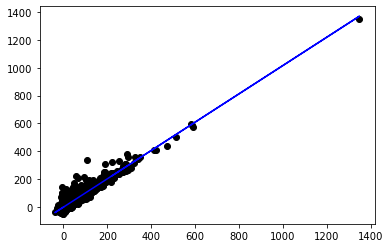

In [27]:
plt.scatter(X[1:10000], Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "blue")
plt.show()

# Regresión Logística

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv")

# En este caso el modelo se aplica a categorías que no responden a valores numéricos continuos.
# Se utiliza de forma binaria, para predecir si un cliente va a comprar un determinado producto o no.
# Los valores devueltos por la expresión se encuentran entre 0 y 1.

P(y) = $\left(\frac{1}{e^(\beta_0 + \beta_1 X_1 +  \beta_2 X_2$ +  \beta_3 X_3 + ... + €)}\right)$

In [6]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
Y = df["ArrDelay"] < 30 # Esta será nuestra variable respuesta: vuelos sin y con retraso (True = 1 / False = 0)
X = df[["DepDelay"]]

In [7]:
Y

6079992     True
1830563     True
2690446    False
6594756     True
1747313     True
           ...  
6881122    False
34194       True
6944802     True
5426941     True
783346     False
Name: ArrDelay, Length: 100000, dtype: bool

In [8]:
# Creamos el modelo con LogisticRegression()
logreg = LogisticRegression()
# Ajustamos el modelo con fit
logreg.fit(X, Y)
# Obtenemos las predicciones
Y_pred = logreg.predict(X)

In [9]:
# La regresión logística nos devuelve probabilidades, selecciona la categoría con probabilidad superior.
np.round(logreg.predict_proba(X),3)
# El primer caso tiene una probabilidad de un 1% de pertenecer al grupo 0 (sin retraso) y 
# un 98.2 de pertenecer al grupo 1 (con retraso)

array([[0.018, 0.982],
       [0.027, 0.973],
       [0.011, 0.989],
       ...,
       [0.061, 0.939],
       [0.009, 0.991],
       [0.013, 0.987]])

Se puede ver que en los tres primeros casos es muy probable que el vuelo no tenga retraso notable. % elem 0,0 - % elem 0,1

In [10]:
# 95,59% de las predicciones es correcta. Vemos en qué caso nuestras predicciones coinciden con el valor real.
np.mean(Y_pred == Y)

0.95654

In [8]:
# En el caso real, tenemos una aproximación del 86,40%, sabemos que en un 86,40% de los casos el vuelo no se retrasa
np.mean(Y)

0.86487

In [11]:
# Las filas son los valores reales (Y), las columnas las predicciones (Y_pred), 10126 (False) ha predicho como 0,  
# 1028 eran los casos que no se habían retrasado, pero que nuestro modelo ha considerado que sí.
# 85596 que son los casos que no se han retrasado y nuestro modelo lo ha clasificado bien.
confusion_matrix = confusion_matrix(Y, Y_pred)
print(confusion_matrix)

# (0,0) -> En este caso el modelo ha predicho como 0 (False = con retraso) y el modelo ha predicho como 0 (con retraso).
# (0,1) -> En este caso el modelo ha predicho como 1 (True = sin retraso) y el modelo ha predicho como 0 (con retraso).
# (1,0) -> En este caso el modelo ha predicho como 0 (False = con retraso) y el modelo ha predicho como 1 (sin retraso).
# (1,1) -> En este caso el modelo ha predicho como 1 (True = sin retraso) y el modelo ha predicho como 1 (sin retraso).

[[10365  3334]
 [ 1012 85289]]


# Bayes, se expresa la probabilidad de un evento aleatorio A, dado B.

In [10]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("base_datos_2008.csv", nrows = 100000)
df = df.sample(frac = 1)
df = df.head(500000)

Para este modelo existen tres variantes vinculadas:
   - Bernouilli, se puede utilizar para el análisis de texto.
   - Multinomial, se utiliza también para el análisis de texto.
   - Gaussian, se utiliza para datos continuos, asume que las variables regresoras están distribuidas normalmente.
    
Este modelo supone que todas las variables son independientes, cosa que no es cierta.

In [11]:
df = df.dropna(subset = ["ArrDelay"])

In [12]:
# Variable respuesta, el retraso en la llegada con vuelos retrasados al menos un minuto.
Y = df["ArrDelay"] > 0

In [13]:
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
df["TailNum"] = df["TailNum"].apply(str)

X = pd.get_dummies(data = df[["Month", "DayofMonth", "TailNum", "DayOfWeek", "Origin", "Dest", "UniqueCarrier"]])

In [16]:
X.head()

,Month_1,DayofMonth_1,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,...,Dest_SMF,Dest_SNA,Dest_STL,Dest_SYR,Dest_TPA,Dest_TUL,Dest_TUS,Dest_XNA,UniqueCarrier_WN,UniqueCarrier_XE
29267,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32117,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59749,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61360,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6865,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Ajustar el modelo
clf = BernoulliNB()
#clf = MultinomialNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [18]:
np.mean(Y == Y_pred)
# Nos predice casi un 66% de los casos.

0.6598512634501206

In [16]:
1 - np.mean(Y)
# Estamos ganando un 8% más en nuestro análisis explicativo.

0.5789681655150054

In [20]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [21]:
np.mean(Y == Y_pred)

0.6428093781028997

In [22]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut", "DepDelay"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [23]:
np.mean(Y == Y_pred)

0.8201078036029099

# Árboles de Clasificación y Regresión

https://fhernanb.github.io/libro_mod_pred/arb-de-regre.html

In [31]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Eliminamos con dropna el subset ArrDelay los datos faltantes,
# Reordenamos con sample (frac = 1)
# Partimos en dos dataframes, el último medio millón de casos y los primeros.

df = pd.read_csv("base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(500000)
df = df.head(500000)

In [32]:
clf = tree.DecisionTreeClassifier()

# Entrenaremos el objeto clf utilizando el método fit con la variable regresora X y la respuesta Y

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

In [33]:
np.mean(Y == Y_pred)

0.999998

In [34]:
# Nuestro modelo está clasificando perfectamente todos los datos.
# Crea un árbol que predice exactamente todas las observaciones, hay que evitarlo.
# Para ello, hay que comparar el conjunto de test con la previsión, hacemos una validación externa con el conjunto test.

np.mean(Y_test == Y_pred_test)

0.892836

In [30]:
# Utilizando el R-cuadrado, una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.

clf = tree.DecisionTreeClassifier()

Y = df["ArrDelay"]
Y_test = dftest["ArrDelay"]

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

print("R cuadrado: ", r2_score(Y, Y_pred))
print("R cuadrado test: ", r2_score(Y_test, Y_pred_test))


R cuadrado:  0.9999980288850467
R cuadrado test:  0.8878199624458387


# Random Forest

In [35]:
# Selecciona de forma aleatoria observaciones de nuestra base de datos. Crea nuevos árboles de regresión y clasificación.
# Da un peso variable a las distintas observaciones y variables.

from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(500000)
df = df.head(500000)

In [36]:
clf = tree.DecisionTreeClassifier()

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [37]:
np.mean(Y_test == Y_pred_test)

0.893578

In [38]:
# Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC

clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.09234844, 0.08138862, 0.08348224, 0.05060033, 0.13451857,
       0.5576618 ])

In [39]:
# Incrementa en un 3% la predicción del modelo anterior (árbol de clasificación).
np.mean(Y_test == Y_pred_test)

0.924222

In [40]:
# Si la variable respuesta fuera numérica utilizaríamos
# RandomForestRegressor()
# La métrica sería R2 en lugar de la comparación entre el modelo de test y el predictivo.

# Support Vector Machine

https://scikit-learn.org/stable/modules/svm.html

In [41]:
# Divide los conjuntos de puntos mediante una recta, intentando maximizar la distancia de los puntos más cercanos a la recta.

from sklearn.svm import SVC
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(1000)
df = df.head(1000)

In [42]:
X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = SVC() # kernel = "linear"
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [43]:
np.mean(Y_test == Y_pred_test)

0.753

# Modelo K-Nearest

In [44]:
# Clasifica cada punto en una categoría dependiendo de sus vecinos más cercanos.
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows = 1e6)

In [45]:
newdf = df[["AirTime", "Distance", "TaxiOut", "ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [46]:
filtro = newdf["ArrDelay"] > 10

In [47]:
# Ponemos etiquetas a nuestros casos.
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro == False] = "Not Delayed"

In [48]:
newdf["ArrDelay"].head()

0    Not Delayed
1    Not Delayed
2        Delayed
3    Not Delayed
4        Delayed
Name: ArrDelay, dtype: object

In [49]:
nbrs_3 = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

In [50]:
nbrs_3.fit(cols, newdf["ArrDelay"])

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [51]:
predicciones_3 = nbrs_3.predict(cols)

In [52]:
np.mean(predicciones_3 == newdf["ArrDelay"])

0.8040059625362947

In [53]:
# El 80,4% están clasificados correctamente, esta medida puede ser engañosa, ya que no conocemos la proporción de nuestros datos
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.6912450368307814

In [54]:
# Casi el 70% de vuelos no se han retrasado, con el modelo estamos indicando 80,4%, hay una desviación de 10 puntos.
# Vamos a ir ajustando mejor la métrica, miramos solo el vecino de al lado.
nbrs_1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
nbrs_1.fit(cols, newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"])

0.8346359548396921

In [55]:
# Observando el vecino más cercano obtenemos una mejor predicción que observando los tres más cercanos.
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.6912450368307814

In [56]:
# Exploramos la matriz de confusión para ver cuánto de bien hemos predicho los casos.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(newdf["ArrDelay"], predicciones_1)
print(confusion_matrix)

[[218051  80009]
 [ 79627 587674]]


In [ ]:
# El elmento (1,1) es el número de vuelos que no se retrasan y que predecimos que no se retrasan
# El elemento (0,0) es el número de vuelos que se retrasan y que predecimos como que se retrasan
# El elemento (0,1) son vuelos que no se retrasan pero que hemos clasificado como que sí se retrasan
# El elemento (1,0) son vuelos que se retrasan pero que hemos clasificado como que no se retrasan

# Validación Externa en Python

Cuando usemos todos los datos para entrenar y evaluar, tenemos evaluación interna. Si tenemos un conjunto de datos para entrenar y otro para evaluar estamos en la evaluación externa.
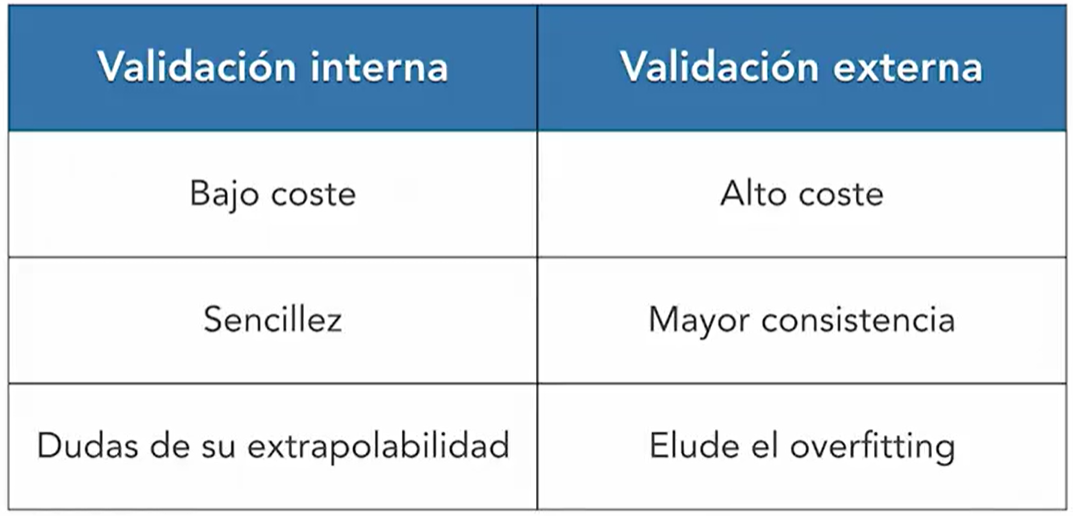

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [58]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [59]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [60]:
# El tamaño del test se establece en un 20% e incluimos el atributo random_state = 10 fijo una semilla para que cuando 
# se vuelva a repetir el ejercicio obtener el mismo resultado.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [61]:
# En este primer caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de datos
regrINTERNA = linear_model.LinearRegression()
regrINTERNA.fit(X, Y)
prediccionesINTERNA = regrINTERNA.predict(X)
print("R2: ", r2_score(Y, prediccionesINTERNA))

# En este segundo caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de entrenamiento y test
regrEXTERNA = linear_model.LinearRegression()
regrEXTERNA.fit(X_train, y_train)
prediccionesEXTERNA = regrEXTERNA.predict(X_test)
print("R2: ", r2_score(y_test, prediccionesEXTERNA))

# En principio el R2 correspondiente al ajuste con todos los datos y lo evaluamos con los mismos datos, 
# tendemos a sobreajustar el modelo, esto implica tener unos resultados de predicción mucho más elevados
# que en el caso de utilizar unos datos de entrenamiento. 

R2:  0.8646599181549292
R2:  0.8439966762933893


# K-Fold

In [62]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

# En el caso anterior dependiendo de los datos que caigan en Train o en Testing el R2 variará.
# Con K-Fold lo que hacemos es obtener una media de un conjunto de particiones de datos, de forma que el resultado
# obtenido puede ser más fiable.
# Replicamos múltiples veces este proceso:  
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [63]:
data = pd.read_csv("base_datos_2008.csv")

In [64]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [65]:
# Hacemos una partición en 10 bloques, y cada vez que haga una partición mezcle los datos shuffle = True
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(X)

10

In [66]:
regr = linear_model.LinearRegression()

# Creamos un vector donde vamos a estar guardando todos los resultados.
resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R2 medio: ", np.mean(resultados))

# Compensamos la dependencia de datos concretos, es mucho más representativa utilizar KFold

R2:  0.9302857963953166
R2:  0.8703742201443257
R2:  0.9029941664494834
R2:  0.8957507210143854
R2:  0.8909825325765682
R2:  0.899783491677933
R2:  0.8997685121972254
R2:  0.8450419125034737
R2:  0.8678046130419637
R2:  0.9279967735185997
R2 medio:  0.8930782739519273


# Leave one out

In [67]:
# En este caso vamos a entrenar el modelo con todos los datos menos uno.
# De utilidad cuando tenemos tamaños de muestra muy reducidos, ya que si no repeteríamos el proceso n-1 veces.
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
import numpy as np

In [68]:
data = pd.read_csv("base_datos_2008.csv")

In [69]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [70]:
loo = LeaveOneOut()

In [71]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("Error: ", (y_test - predicciones[0])**2)

Error:  0    20.83229
Name: ArrDelay, dtype: float64
Error:  1    1.405866
Name: ArrDelay, dtype: float64
Error:  2    27.625023
Name: ArrDelay, dtype: float64
Error:  3    73.859674
Name: ArrDelay, dtype: float64
Error:  4    0.957407
Name: ArrDelay, dtype: float64
Error:  5    48.592525
Name: ArrDelay, dtype: float64
Error:  6    259.914487
Name: ArrDelay, dtype: float64
Error:  7    2.288953
Name: ArrDelay, dtype: float64
Error:  8    75.946323
Name: ArrDelay, dtype: float64
Error:  9    84.691007
Name: ArrDelay, dtype: float64
Error:  10    2.788204
Name: ArrDelay, dtype: float64
Error:  11    52.674215
Name: ArrDelay, dtype: float64
Error:  12    392.536987
Name: ArrDelay, dtype: float64
Error:  13    1.113987
Name: ArrDelay, dtype: float64
Error:  14    7.66474
Name: ArrDelay, dtype: float64
Error:  15    0.052575
Name: ArrDelay, dtype: float64
Error:  16    0.047117
Name: ArrDelay, dtype: float64
Error:  17    114.39778
Name: ArrDelay, dtype: float64
Error:  18    15.383778
Name

Error:  173    11.191101
Name: ArrDelay, dtype: float64
Error:  174    15.444079
Name: ArrDelay, dtype: float64
Error:  175    3.849147
Name: ArrDelay, dtype: float64
Error:  176    55.850624
Name: ArrDelay, dtype: float64
Error:  177    590.628043
Name: ArrDelay, dtype: float64
Error:  178    3.599245
Name: ArrDelay, dtype: float64
Error:  179    1.244412
Name: ArrDelay, dtype: float64
Error:  180    5.510974
Name: ArrDelay, dtype: float64
Error:  181    10.898908
Name: ArrDelay, dtype: float64
Error:  182    96.955091
Name: ArrDelay, dtype: float64
Error:  183    188.881069
Name: ArrDelay, dtype: float64
Error:  184    52.096834
Name: ArrDelay, dtype: float64
Error:  185    53.78553
Name: ArrDelay, dtype: float64
Error:  186    19.488855
Name: ArrDelay, dtype: float64
Error:  187    5.801754
Name: ArrDelay, dtype: float64
Error:  188    1.209277
Name: ArrDelay, dtype: float64
Error:  189    164.503567
Name: ArrDelay, dtype: float64
Error:  190    2.008606
Name: ArrDelay, dtype: float

Error:  320    0.657731
Name: ArrDelay, dtype: float64
Error:  321    162.331423
Name: ArrDelay, dtype: float64
Error:  322    142.330631
Name: ArrDelay, dtype: float64
Error:  323    333.750993
Name: ArrDelay, dtype: float64
Error:  324    6.922871
Name: ArrDelay, dtype: float64
Error:  325    59.187467
Name: ArrDelay, dtype: float64
Error:  326    8.005921
Name: ArrDelay, dtype: float64
Error:  327    157.274168
Name: ArrDelay, dtype: float64
Error:  328    79.414618
Name: ArrDelay, dtype: float64
Error:  329    96.026413
Name: ArrDelay, dtype: float64
Error:  330    182.628348
Name: ArrDelay, dtype: float64
Error:  331    10.424832
Name: ArrDelay, dtype: float64
Error:  332    892.087164
Name: ArrDelay, dtype: float64
Error:  333    259.770097
Name: ArrDelay, dtype: float64
Error:  334    107.218083
Name: ArrDelay, dtype: float64
Error:  335    72.63527
Name: ArrDelay, dtype: float64
Error:  336    60.099328
Name: ArrDelay, dtype: float64
Error:  337    52.244855
Name: ArrDelay, dty

Error:  471    20.666357
Name: ArrDelay, dtype: float64
Error:  472    1.092617
Name: ArrDelay, dtype: float64
Error:  473    201.933763
Name: ArrDelay, dtype: float64
Error:  474    0.009097
Name: ArrDelay, dtype: float64
Error:  475    13.456846
Name: ArrDelay, dtype: float64
Error:  476    14.093481
Name: ArrDelay, dtype: float64
Error:  477    0.791676
Name: ArrDelay, dtype: float64
Error:  478    1.649884
Name: ArrDelay, dtype: float64
Error:  479    0.571858
Name: ArrDelay, dtype: float64
Error:  480    94.407036
Name: ArrDelay, dtype: float64
Error:  481    105.027645
Name: ArrDelay, dtype: float64
Error:  482    0.040221
Name: ArrDelay, dtype: float64
Error:  483    294.483066
Name: ArrDelay, dtype: float64
Error:  484    35.56074
Name: ArrDelay, dtype: float64
Error:  485    0.263008
Name: ArrDelay, dtype: float64
Error:  486    0.216145
Name: ArrDelay, dtype: float64
Error:  487    1.455676
Name: ArrDelay, dtype: float64
Error:  488    3.755931
Name: ArrDelay, dtype: float64


Error:  635    8.916624
Name: ArrDelay, dtype: float64
Error:  636    77.093197
Name: ArrDelay, dtype: float64
Error:  637    57.953087
Name: ArrDelay, dtype: float64
Error:  638    274.165249
Name: ArrDelay, dtype: float64
Error:  639    23.41511
Name: ArrDelay, dtype: float64
Error:  640    0.553945
Name: ArrDelay, dtype: float64
Error:  641    69.962154
Name: ArrDelay, dtype: float64
Error:  642    0.03581
Name: ArrDelay, dtype: float64
Error:  643    4.090526
Name: ArrDelay, dtype: float64
Error:  644    538.865039
Name: ArrDelay, dtype: float64
Error:  645    53.987935
Name: ArrDelay, dtype: float64
Error:  646    33.699724
Name: ArrDelay, dtype: float64
Error:  647    0.452784
Name: ArrDelay, dtype: float64
Error:  648    4.197018
Name: ArrDelay, dtype: float64
Error:  649    253.611433
Name: ArrDelay, dtype: float64
Error:  650    955.177231
Name: ArrDelay, dtype: float64
Error:  651    3.674437
Name: ArrDelay, dtype: float64
Error:  652    172.913474
Name: ArrDelay, dtype: floa

Error:  808    15.733913
Name: ArrDelay, dtype: float64
Error:  809    9.340364
Name: ArrDelay, dtype: float64
Error:  810    33.725792
Name: ArrDelay, dtype: float64
Error:  811    108.244175
Name: ArrDelay, dtype: float64
Error:  812    8.624128
Name: ArrDelay, dtype: float64
Error:  813    18.372683
Name: ArrDelay, dtype: float64
Error:  814    0.280604
Name: ArrDelay, dtype: float64
Error:  815    111.430666
Name: ArrDelay, dtype: float64
Error:  816    195.062411
Name: ArrDelay, dtype: float64
Error:  817    284.975093
Name: ArrDelay, dtype: float64
Error:  818    33.109581
Name: ArrDelay, dtype: float64
Error:  819    0.009442
Name: ArrDelay, dtype: float64
Error:  820    30.771234
Name: ArrDelay, dtype: float64
Error:  821    73.478839
Name: ArrDelay, dtype: float64
Error:  822    0.248944
Name: ArrDelay, dtype: float64
Error:  823    0.162143
Name: ArrDelay, dtype: float64
Error:  824    3.816403
Name: ArrDelay, dtype: float64
Error:  825    0.851271
Name: ArrDelay, dtype: floa

Error:  963    79.875797
Name: ArrDelay, dtype: float64
Error:  964    1.044549
Name: ArrDelay, dtype: float64
Error:  965    68.476577
Name: ArrDelay, dtype: float64
Error:  966    1.343296
Name: ArrDelay, dtype: float64
Error:  967    21.475071
Name: ArrDelay, dtype: float64
Error:  968    41.791352
Name: ArrDelay, dtype: float64
Error:  969    0.266898
Name: ArrDelay, dtype: float64
Error:  970    7.025698
Name: ArrDelay, dtype: float64
Error:  971    5.832017
Name: ArrDelay, dtype: float64
Error:  972    12.807602
Name: ArrDelay, dtype: float64
Error:  973    14.205157
Name: ArrDelay, dtype: float64
Error:  974    1.729553
Name: ArrDelay, dtype: float64
Error:  975    12.090527
Name: ArrDelay, dtype: float64
Error:  976    87.289047
Name: ArrDelay, dtype: float64
Error:  977    14.667918
Name: ArrDelay, dtype: float64
Error:  978    0.966177
Name: ArrDelay, dtype: float64
Error:  979    46.86034
Name: ArrDelay, dtype: float64
Error:  980    0.23176
Name: ArrDelay, dtype: float64
Er

Error:  1136    180.098194
Name: ArrDelay, dtype: float64
Error:  1137    0.008692
Name: ArrDelay, dtype: float64
Error:  1138    16.629368
Name: ArrDelay, dtype: float64
Error:  1139    26.093528
Name: ArrDelay, dtype: float64
Error:  1140    205.482457
Name: ArrDelay, dtype: float64
Error:  1141    18.169769
Name: ArrDelay, dtype: float64
Error:  1142    11.831047
Name: ArrDelay, dtype: float64
Error:  1143    114.684079
Name: ArrDelay, dtype: float64
Error:  1144    17.134137
Name: ArrDelay, dtype: float64
Error:  1145    0.728699
Name: ArrDelay, dtype: float64
Error:  1146    13.271733
Name: ArrDelay, dtype: float64
Error:  1147    73.788703
Name: ArrDelay, dtype: float64
Error:  1148    10.337999
Name: ArrDelay, dtype: float64
Error:  1149    1.163633
Name: ArrDelay, dtype: float64
Error:  1150    149.317974
Name: ArrDelay, dtype: float64
Error:  1151    241.848654
Name: ArrDelay, dtype: float64
Error:  1152    43.75043
Name: ArrDelay, dtype: float64
Error:  1153    16.279458
Name

Error:  1280    3.900136
Name: ArrDelay, dtype: float64
Error:  1281    0.38601
Name: ArrDelay, dtype: float64
Error:  1282    4.200029
Name: ArrDelay, dtype: float64
Error:  1283    9.919303
Name: ArrDelay, dtype: float64
Error:  1284    7.852922
Name: ArrDelay, dtype: float64
Error:  1285    224.043271
Name: ArrDelay, dtype: float64
Error:  1286    139.036457
Name: ArrDelay, dtype: float64
Error:  1287    1470.698647
Name: ArrDelay, dtype: float64
Error:  1288    126.033794
Name: ArrDelay, dtype: float64
Error:  1289    182.495843
Name: ArrDelay, dtype: float64
Error:  1290    4.018254
Name: ArrDelay, dtype: float64
Error:  1291    1.172746
Name: ArrDelay, dtype: float64
Error:  1292    298.900211
Name: ArrDelay, dtype: float64
Error:  1293    26.808275
Name: ArrDelay, dtype: float64
Error:  1294    18.784329
Name: ArrDelay, dtype: float64
Error:  1295    18.577111
Name: ArrDelay, dtype: float64
Error:  1296    56.843049
Name: ArrDelay, dtype: float64
Error:  1297    2.039521
Name: A

Error:  1453    14.417904
Name: ArrDelay, dtype: float64
Error:  1454    64.476485
Name: ArrDelay, dtype: float64
Error:  1455    1542.389637
Name: ArrDelay, dtype: float64
Error:  1456    14.116288
Name: ArrDelay, dtype: float64
Error:  1457    111.1303
Name: ArrDelay, dtype: float64
Error:  1458    0.197791
Name: ArrDelay, dtype: float64
Error:  1459    1.283205
Name: ArrDelay, dtype: float64
Error:  1460    2.585578
Name: ArrDelay, dtype: float64
Error:  1461    148.070222
Name: ArrDelay, dtype: float64
Error:  1462    130.29396
Name: ArrDelay, dtype: float64
Error:  1463    32.497852
Name: ArrDelay, dtype: float64
Error:  1464    96.54848
Name: ArrDelay, dtype: float64
Error:  1465    55.123589
Name: ArrDelay, dtype: float64
Error:  1466    0.352831
Name: ArrDelay, dtype: float64
Error:  1467    0.34909
Name: ArrDelay, dtype: float64
Error:  1468    1411.994353
Name: ArrDelay, dtype: float64
Error:  1469    21.259437
Name: ArrDelay, dtype: float64
Error:  1470    0.233906
Name: Arr

Error:  1602    28.403627
Name: ArrDelay, dtype: float64
Error:  1603    21.693898
Name: ArrDelay, dtype: float64
Error:  1604    64.477882
Name: ArrDelay, dtype: float64
Error:  1605    71.943904
Name: ArrDelay, dtype: float64
Error:  1606    365.010191
Name: ArrDelay, dtype: float64
Error:  1607    55.653292
Name: ArrDelay, dtype: float64
Error:  1608    30.312188
Name: ArrDelay, dtype: float64
Error:  1609    3.318198
Name: ArrDelay, dtype: float64
Error:  1610    119.805632
Name: ArrDelay, dtype: float64
Error:  1611    16.150142
Name: ArrDelay, dtype: float64
Error:  1612    53.283744
Name: ArrDelay, dtype: float64
Error:  1613    171.570782
Name: ArrDelay, dtype: float64
Error:  1614    275.19633
Name: ArrDelay, dtype: float64
Error:  1615    132.044539
Name: ArrDelay, dtype: float64
Error:  1616    442.184862
Name: ArrDelay, dtype: float64
Error:  1617    19.341674
Name: ArrDelay, dtype: float64
Error:  1618    220.564219
Name: ArrDelay, dtype: float64
Error:  1619    49.149175


Error:  1750    97.685568
Name: ArrDelay, dtype: float64
Error:  1751    45.858609
Name: ArrDelay, dtype: float64
Error:  1752    132.910268
Name: ArrDelay, dtype: float64
Error:  1753    105.616906
Name: ArrDelay, dtype: float64
Error:  1754    247.052014
Name: ArrDelay, dtype: float64
Error:  1755    63.291891
Name: ArrDelay, dtype: float64
Error:  1756    7.896993
Name: ArrDelay, dtype: float64
Error:  1757    0.318443
Name: ArrDelay, dtype: float64
Error:  1758    12.744859
Name: ArrDelay, dtype: float64
Error:  1759    16.966046
Name: ArrDelay, dtype: float64
Error:  1760    63.127257
Name: ArrDelay, dtype: float64
Error:  1761    1.727482
Name: ArrDelay, dtype: float64
Error:  1762    44.50468
Name: ArrDelay, dtype: float64
Error:  1763    5.942095
Name: ArrDelay, dtype: float64
Error:  1764    9.851686
Name: ArrDelay, dtype: float64
Error:  1765    28.435989
Name: ArrDelay, dtype: float64
Error:  1766    125.970442
Name: ArrDelay, dtype: float64
Error:  1767    57.343929
Name: A

Error:  1901    5.104487
Name: ArrDelay, dtype: float64
Error:  1902    0.011386
Name: ArrDelay, dtype: float64
Error:  1903    86.08777
Name: ArrDelay, dtype: float64
Error:  1904    12.000916
Name: ArrDelay, dtype: float64
Error:  1905    129.350745
Name: ArrDelay, dtype: float64
Error:  1906    76.391153
Name: ArrDelay, dtype: float64
Error:  1907    48.492394
Name: ArrDelay, dtype: float64
Error:  1908    0.923227
Name: ArrDelay, dtype: float64
Error:  1909    108.397089
Name: ArrDelay, dtype: float64
Error:  1910    18.406177
Name: ArrDelay, dtype: float64
Error:  1911    36.70711
Name: ArrDelay, dtype: float64
Error:  1912    0.24072
Name: ArrDelay, dtype: float64
Error:  1913    14.141539
Name: ArrDelay, dtype: float64
Error:  1914    115.107083
Name: ArrDelay, dtype: float64
Error:  1915    46.179651
Name: ArrDelay, dtype: float64
Error:  1916    1.036326
Name: ArrDelay, dtype: float64
Error:  1917    80.183878
Name: ArrDelay, dtype: float64
Error:  1918    133.375404
Name: Arr

Error:  2069    54.164123
Name: ArrDelay, dtype: float64
Error:  2070    48.706469
Name: ArrDelay, dtype: float64
Error:  2071    405.979722
Name: ArrDelay, dtype: float64
Error:  2072    105.514613
Name: ArrDelay, dtype: float64
Error:  2073    110.326449
Name: ArrDelay, dtype: float64
Error:  2074    0.177058
Name: ArrDelay, dtype: float64
Error:  2075    117.743556
Name: ArrDelay, dtype: float64
Error:  2076    23.788569
Name: ArrDelay, dtype: float64
Error:  2077    18.437331
Name: ArrDelay, dtype: float64
Error:  2078    0.743535
Name: ArrDelay, dtype: float64
Error:  2079    309.226786
Name: ArrDelay, dtype: float64
Error:  2080    0.83095
Name: ArrDelay, dtype: float64
Error:  2081    14.630145
Name: ArrDelay, dtype: float64
Error:  2082    3.909681
Name: ArrDelay, dtype: float64
Error:  2083    2.592215
Name: ArrDelay, dtype: float64
Error:  2084    509.464434
Name: ArrDelay, dtype: float64
Error:  2085    21.064557
Name: ArrDelay, dtype: float64
Error:  2086    0.709903
Name: 

Error:  2230    39.746953
Name: ArrDelay, dtype: float64
Error:  2231    38.421411
Name: ArrDelay, dtype: float64
Error:  2232    33.967695
Name: ArrDelay, dtype: float64
Error:  2233    162.906742
Name: ArrDelay, dtype: float64
Error:  2234    26.320305
Name: ArrDelay, dtype: float64
Error:  2235    128.067615
Name: ArrDelay, dtype: float64
Error:  2236    330.169147
Name: ArrDelay, dtype: float64
Error:  2237    1122.360611
Name: ArrDelay, dtype: float64
Error:  2238    3732.086631
Name: ArrDelay, dtype: float64
Error:  2239    53.597553
Name: ArrDelay, dtype: float64
Error:  2240    65.850241
Name: ArrDelay, dtype: float64
Error:  2241    244.348514
Name: ArrDelay, dtype: float64
Error:  2242    50.089028
Name: ArrDelay, dtype: float64
Error:  2243    124.696469
Name: ArrDelay, dtype: float64
Error:  2244    12.603527
Name: ArrDelay, dtype: float64
Error:  2245    447.543136
Name: ArrDelay, dtype: float64
Error:  2246    151.978498
Name: ArrDelay, dtype: float64
Error:  2247    9.67

Error:  2382    219.511995
Name: ArrDelay, dtype: float64
Error:  2383    0.401451
Name: ArrDelay, dtype: float64
Error:  2384    158.423657
Name: ArrDelay, dtype: float64
Error:  2385    24.613205
Name: ArrDelay, dtype: float64
Error:  2386    0.289207
Name: ArrDelay, dtype: float64
Error:  2387    5.585238
Name: ArrDelay, dtype: float64
Error:  2388    0.434663
Name: ArrDelay, dtype: float64
Error:  2389    46.777423
Name: ArrDelay, dtype: float64
Error:  2390    16.84631
Name: ArrDelay, dtype: float64
Error:  2391    22.350598
Name: ArrDelay, dtype: float64
Error:  2392    15.021811
Name: ArrDelay, dtype: float64
Error:  2393    0.346501
Name: ArrDelay, dtype: float64
Error:  2394    287.242492
Name: ArrDelay, dtype: float64
Error:  2395    0.871902
Name: ArrDelay, dtype: float64
Error:  2396    1.15785
Name: ArrDelay, dtype: float64
Error:  2397    89.371307
Name: ArrDelay, dtype: float64
Error:  2398    66.023062
Name: ArrDelay, dtype: float64
Error:  2399    163.250156
Name: ArrD

Error:  2550    46.718018
Name: ArrDelay, dtype: float64
Error:  2551    127.820611
Name: ArrDelay, dtype: float64
Error:  2552    13.941786
Name: ArrDelay, dtype: float64
Error:  2553    243.56764
Name: ArrDelay, dtype: float64
Error:  2554    1.441621
Name: ArrDelay, dtype: float64
Error:  2555    41.003226
Name: ArrDelay, dtype: float64
Error:  2556    402.701849
Name: ArrDelay, dtype: float64
Error:  2557    42.391841
Name: ArrDelay, dtype: float64
Error:  2558    0.371598
Name: ArrDelay, dtype: float64
Error:  2559    23.51123
Name: ArrDelay, dtype: float64
Error:  2560    1.493248
Name: ArrDelay, dtype: float64
Error:  2561    149.706651
Name: ArrDelay, dtype: float64
Error:  2562    0.756994
Name: ArrDelay, dtype: float64
Error:  2563    12.557544
Name: ArrDelay, dtype: float64
Error:  2564    39.596108
Name: ArrDelay, dtype: float64
Error:  2565    2.536036
Name: ArrDelay, dtype: float64
Error:  2566    70.966813
Name: ArrDelay, dtype: float64
Error:  2567    1.877718
Name: Arr

Error:  2697    17.646744
Name: ArrDelay, dtype: float64
Error:  2698    40.103276
Name: ArrDelay, dtype: float64
Error:  2699    174.869866
Name: ArrDelay, dtype: float64
Error:  2700    96.152823
Name: ArrDelay, dtype: float64
Error:  2701    206.740048
Name: ArrDelay, dtype: float64
Error:  2702    23.629146
Name: ArrDelay, dtype: float64
Error:  2703    96.712927
Name: ArrDelay, dtype: float64
Error:  2704    0.02294
Name: ArrDelay, dtype: float64
Error:  2705    796.930179
Name: ArrDelay, dtype: float64
Error:  2706    0.011328
Name: ArrDelay, dtype: float64
Error:  2707    12.998542
Name: ArrDelay, dtype: float64
Error:  2708    8.643604
Name: ArrDelay, dtype: float64
Error:  2709    26.62047
Name: ArrDelay, dtype: float64
Error:  2710    0.088627
Name: ArrDelay, dtype: float64
Error:  2711    14.939146
Name: ArrDelay, dtype: float64
Error:  2712    12.163302
Name: ArrDelay, dtype: float64
Error:  2713    44.955812
Name: ArrDelay, dtype: float64
Error:  2714    30.391909
Name: Ar

Error:  2845    3.680084
Name: ArrDelay, dtype: float64
Error:  2846    13.428354
Name: ArrDelay, dtype: float64
Error:  2847    188.275521
Name: ArrDelay, dtype: float64
Error:  2848    88.610023
Name: ArrDelay, dtype: float64
Error:  2849    100.231926
Name: ArrDelay, dtype: float64
Error:  2850    108.463849
Name: ArrDelay, dtype: float64
Error:  2851    79.0446
Name: ArrDelay, dtype: float64
Error:  2852    68.645462
Name: ArrDelay, dtype: float64
Error:  2853    19.081896
Name: ArrDelay, dtype: float64
Error:  2854    51.142476
Name: ArrDelay, dtype: float64
Error:  2855    2413.452911
Name: ArrDelay, dtype: float64
Error:  2856    12.385935
Name: ArrDelay, dtype: float64
Error:  2857    750.950192
Name: ArrDelay, dtype: float64
Error:  2858    4.984737
Name: ArrDelay, dtype: float64
Error:  2859    2.963454
Name: ArrDelay, dtype: float64
Error:  2860    82.305669
Name: ArrDelay, dtype: float64
Error:  2861    105.706736
Name: ArrDelay, dtype: float64
Error:  2862    8.233333
Name

Error:  2990    15.895203
Name: ArrDelay, dtype: float64
Error:  2991    10.026513
Name: ArrDelay, dtype: float64
Error:  2992    69.283604
Name: ArrDelay, dtype: float64
Error:  2993    15.409906
Name: ArrDelay, dtype: float64
Error:  2994    15.812204
Name: ArrDelay, dtype: float64
Error:  2995    158.372745
Name: ArrDelay, dtype: float64
Error:  2996    18.037712
Name: ArrDelay, dtype: float64
Error:  2997    15.754011
Name: ArrDelay, dtype: float64
Error:  2998    2.685895
Name: ArrDelay, dtype: float64
Error:  2999    16.941405
Name: ArrDelay, dtype: float64
Error:  3000    33.939497
Name: ArrDelay, dtype: float64
Error:  3001    148.779403
Name: ArrDelay, dtype: float64
Error:  3002    22.577486
Name: ArrDelay, dtype: float64
Error:  3003    0.068125
Name: ArrDelay, dtype: float64
Error:  3004    129.794661
Name: ArrDelay, dtype: float64
Error:  3005    17.803976
Name: ArrDelay, dtype: float64
Error:  3006    1.464522
Name: ArrDelay, dtype: float64
Error:  3007    36.664256
Name:

Error:  3140    40.354565
Name: ArrDelay, dtype: float64
Error:  3141    195.651925
Name: ArrDelay, dtype: float64
Error:  3142    54.956068
Name: ArrDelay, dtype: float64
Error:  3143    27.178217
Name: ArrDelay, dtype: float64
Error:  3144    35.131554
Name: ArrDelay, dtype: float64
Error:  3145    1.560112
Name: ArrDelay, dtype: float64
Error:  3146    24.692526
Name: ArrDelay, dtype: float64
Error:  3147    5.984983
Name: ArrDelay, dtype: float64
Error:  3148    2.483296
Name: ArrDelay, dtype: float64
Error:  3149    127.372679
Name: ArrDelay, dtype: float64
Error:  3150    6.329315
Name: ArrDelay, dtype: float64
Error:  3151    4.191434
Name: ArrDelay, dtype: float64
Error:  3152    237.747158
Name: ArrDelay, dtype: float64
Error:  3153    167.758681
Name: ArrDelay, dtype: float64
Error:  3154    34.094389
Name: ArrDelay, dtype: float64
Error:  3155    24.837841
Name: ArrDelay, dtype: float64
Error:  3156    858.616465
Name: ArrDelay, dtype: float64
Error:  3157    3.674066
Name: 

Error:  3312    9.402721
Name: ArrDelay, dtype: float64
Error:  3313    2.271575
Name: ArrDelay, dtype: float64
Error:  3314    123.43668
Name: ArrDelay, dtype: float64
Error:  3315    19.059215
Name: ArrDelay, dtype: float64
Error:  3316    147.517346
Name: ArrDelay, dtype: float64
Error:  3317    4.778861
Name: ArrDelay, dtype: float64
Error:  3318    2.188636
Name: ArrDelay, dtype: float64
Error:  3319    96.266777
Name: ArrDelay, dtype: float64
Error:  3320    40.555283
Name: ArrDelay, dtype: float64
Error:  3321    0.480855
Name: ArrDelay, dtype: float64
Error:  3322    12.006204
Name: ArrDelay, dtype: float64
Error:  3323    0.083993
Name: ArrDelay, dtype: float64
Error:  3324    11.309239
Name: ArrDelay, dtype: float64
Error:  3325    150.342379
Name: ArrDelay, dtype: float64
Error:  3326    20.509476
Name: ArrDelay, dtype: float64
Error:  3327    34.451885
Name: ArrDelay, dtype: float64
Error:  3328    12.424132
Name: ArrDelay, dtype: float64
Error:  3329    159.86591
Name: Arr

Error:  3467    13.892901
Name: ArrDelay, dtype: float64
Error:  3468    40.919873
Name: ArrDelay, dtype: float64
Error:  3469    202.933258
Name: ArrDelay, dtype: float64
Error:  3470    110.221725
Name: ArrDelay, dtype: float64
Error:  3471    410.386504
Name: ArrDelay, dtype: float64
Error:  3472    49.837492
Name: ArrDelay, dtype: float64
Error:  3473    6.795529
Name: ArrDelay, dtype: float64
Error:  3474    21.494068
Name: ArrDelay, dtype: float64
Error:  3475    10.031953
Name: ArrDelay, dtype: float64
Error:  3476    6.578777
Name: ArrDelay, dtype: float64
Error:  3477    177.072264
Name: ArrDelay, dtype: float64
Error:  3478    22.745877
Name: ArrDelay, dtype: float64
Error:  3479    1.38614
Name: ArrDelay, dtype: float64
Error:  3480    6.111978
Name: ArrDelay, dtype: float64
Error:  3481    542.387359
Name: ArrDelay, dtype: float64
Error:  3482    27.928429
Name: ArrDelay, dtype: float64
Error:  3483    696.970124
Name: ArrDelay, dtype: float64
Error:  3484    5.965041
Name:

Error:  3623    102.301963
Name: ArrDelay, dtype: float64
Error:  3624    9.934689
Name: ArrDelay, dtype: float64
Error:  3625    196.104572
Name: ArrDelay, dtype: float64
Error:  3626    90.59285
Name: ArrDelay, dtype: float64
Error:  3627    44.897068
Name: ArrDelay, dtype: float64
Error:  3628    229.140333
Name: ArrDelay, dtype: float64
Error:  3629    35.456089
Name: ArrDelay, dtype: float64
Error:  3630    1.526227
Name: ArrDelay, dtype: float64
Error:  3631    107.100282
Name: ArrDelay, dtype: float64
Error:  3632    0.024137
Name: ArrDelay, dtype: float64
Error:  3633    12.61671
Name: ArrDelay, dtype: float64
Error:  3634    200.395391
Name: ArrDelay, dtype: float64
Error:  3635    3.213971
Name: ArrDelay, dtype: float64
Error:  3636    26.805442
Name: ArrDelay, dtype: float64
Error:  3637    60.945701
Name: ArrDelay, dtype: float64
Error:  3638    206.369317
Name: ArrDelay, dtype: float64
Error:  3639    511.411069
Name: ArrDelay, dtype: float64
Error:  3640    15.125388
Name

Error:  3777    118.087476
Name: ArrDelay, dtype: float64
Error:  3778    108.295668
Name: ArrDelay, dtype: float64
Error:  3779    48.453179
Name: ArrDelay, dtype: float64
Error:  3780    131.081271
Name: ArrDelay, dtype: float64
Error:  3781    145.177463
Name: ArrDelay, dtype: float64
Error:  3782    0.002206
Name: ArrDelay, dtype: float64
Error:  3783    61.313992
Name: ArrDelay, dtype: float64
Error:  3784    234.79704
Name: ArrDelay, dtype: float64
Error:  3785    36.259052
Name: ArrDelay, dtype: float64
Error:  3786    5.768545
Name: ArrDelay, dtype: float64
Error:  3787    690.18924
Name: ArrDelay, dtype: float64
Error:  3788    51.199162
Name: ArrDelay, dtype: float64
Error:  3789    19.684751
Name: ArrDelay, dtype: float64
Error:  3790    63.142102
Name: ArrDelay, dtype: float64
Error:  3791    17.794431
Name: ArrDelay, dtype: float64
Error:  3792    24.865645
Name: ArrDelay, dtype: float64
Error:  3793    183.58265
Name: ArrDelay, dtype: float64
Error:  3794    69.650211
Nam

Error:  3932    32.34421
Name: ArrDelay, dtype: float64
Error:  3933    8.491329
Name: ArrDelay, dtype: float64
Error:  3934    0.699326
Name: ArrDelay, dtype: float64
Error:  3935    180.786981
Name: ArrDelay, dtype: float64
Error:  3936    22.780086
Name: ArrDelay, dtype: float64
Error:  3937    1.493979
Name: ArrDelay, dtype: float64
Error:  3938    32.416826
Name: ArrDelay, dtype: float64
Error:  3939    71.941655
Name: ArrDelay, dtype: float64
Error:  3940    2.435094
Name: ArrDelay, dtype: float64
Error:  3941    86.060738
Name: ArrDelay, dtype: float64
Error:  3942    131.078211
Name: ArrDelay, dtype: float64
Error:  3943    26.699407
Name: ArrDelay, dtype: float64
Error:  3944    0.515794
Name: ArrDelay, dtype: float64
Error:  3945    253.174835
Name: ArrDelay, dtype: float64
Error:  3946    26.240909
Name: ArrDelay, dtype: float64
Error:  3947    3.033536
Name: ArrDelay, dtype: float64
Error:  3948    70.548646
Name: ArrDelay, dtype: float64
Error:  3949    7.695971
Name: ArrD

Error:  4082    1716.999641
Name: ArrDelay, dtype: float64
Error:  4083    357.526014
Name: ArrDelay, dtype: float64
Error:  4084    328.013383
Name: ArrDelay, dtype: float64
Error:  4085    23.962794
Name: ArrDelay, dtype: float64
Error:  4086    0.002417
Name: ArrDelay, dtype: float64
Error:  4087    198.54656
Name: ArrDelay, dtype: float64
Error:  4088    0.075486
Name: ArrDelay, dtype: float64
Error:  4089    55.990512
Name: ArrDelay, dtype: float64
Error:  4090    85.861361
Name: ArrDelay, dtype: float64
Error:  4091    255.867311
Name: ArrDelay, dtype: float64
Error:  4092    30.414855
Name: ArrDelay, dtype: float64
Error:  4093    25.476401
Name: ArrDelay, dtype: float64
Error:  4094    50.948072
Name: ArrDelay, dtype: float64
Error:  4095    5.798781
Name: ArrDelay, dtype: float64
Error:  4096    17.467389
Name: ArrDelay, dtype: float64
Error:  4097    534.523811
Name: ArrDelay, dtype: float64
Error:  4098    216.248837
Name: ArrDelay, dtype: float64
Error:  4099    33.230824
N

Error:  4252    84.181099
Name: ArrDelay, dtype: float64
Error:  4253    0.026026
Name: ArrDelay, dtype: float64
Error:  4254    1112.912919
Name: ArrDelay, dtype: float64
Error:  4255    13.305222
Name: ArrDelay, dtype: float64
Error:  4256    40.680464
Name: ArrDelay, dtype: float64
Error:  4257    1.769075
Name: ArrDelay, dtype: float64
Error:  4258    1123.173019
Name: ArrDelay, dtype: float64
Error:  4259    5.109993
Name: ArrDelay, dtype: float64
Error:  4260    19.475712
Name: ArrDelay, dtype: float64
Error:  4261    52.174864
Name: ArrDelay, dtype: float64
Error:  4262    123.519927
Name: ArrDelay, dtype: float64
Error:  4263    2.145138
Name: ArrDelay, dtype: float64
Error:  4264    13.027068
Name: ArrDelay, dtype: float64
Error:  4265    17.888337
Name: ArrDelay, dtype: float64
Error:  4266    127.247415
Name: ArrDelay, dtype: float64
Error:  4267    567.141585
Name: ArrDelay, dtype: float64
Error:  4268    75.420239
Name: ArrDelay, dtype: float64
Error:  4269    0.149406
Nam

Error:  4424    54.451182
Name: ArrDelay, dtype: float64
Error:  4425    25.452646
Name: ArrDelay, dtype: float64
Error:  4426    4.089445
Name: ArrDelay, dtype: float64
Error:  4427    0.637781
Name: ArrDelay, dtype: float64
Error:  4428    3.124698
Name: ArrDelay, dtype: float64
Error:  4429    1.670517
Name: ArrDelay, dtype: float64
Error:  4430    411.208274
Name: ArrDelay, dtype: float64
Error:  4431    9.65343
Name: ArrDelay, dtype: float64
Error:  4432    13.679182
Name: ArrDelay, dtype: float64
Error:  4433    295.243855
Name: ArrDelay, dtype: float64
Error:  4434    272.74088
Name: ArrDelay, dtype: float64
Error:  4435    34.476681
Name: ArrDelay, dtype: float64
Error:  4436    202.597899
Name: ArrDelay, dtype: float64
Error:  4437    46.939006
Name: ArrDelay, dtype: float64
Error:  4438    20.326401
Name: ArrDelay, dtype: float64
Error:  4439    36.989058
Name: ArrDelay, dtype: float64
Error:  4440    3.59895
Name: ArrDelay, dtype: float64
Error:  4441    0.003788
Name: ArrDe

Error:  4570    0.925552
Name: ArrDelay, dtype: float64
Error:  4571    34.214188
Name: ArrDelay, dtype: float64
Error:  4572    7.530425
Name: ArrDelay, dtype: float64
Error:  4573    168.375379
Name: ArrDelay, dtype: float64
Error:  4574    31.192506
Name: ArrDelay, dtype: float64
Error:  4575    171.219822
Name: ArrDelay, dtype: float64
Error:  4576    58.703431
Name: ArrDelay, dtype: float64
Error:  4577    86.801443
Name: ArrDelay, dtype: float64
Error:  4578    1602.583185
Name: ArrDelay, dtype: float64
Error:  4579    5.663477
Name: ArrDelay, dtype: float64
Error:  4580    91.613184
Name: ArrDelay, dtype: float64
Error:  4581    4.956757
Name: ArrDelay, dtype: float64
Error:  4582    380.829875
Name: ArrDelay, dtype: float64
Error:  4583    228.019245
Name: ArrDelay, dtype: float64
Error:  4584    1121.083101
Name: ArrDelay, dtype: float64
Error:  4585    71.079009
Name: ArrDelay, dtype: float64
Error:  4586    126.746501
Name: ArrDelay, dtype: float64
Error:  4587    1.672818
N

Error:  4736    23.442916
Name: ArrDelay, dtype: float64
Error:  4737    0.144559
Name: ArrDelay, dtype: float64
Error:  4738    0.678033
Name: ArrDelay, dtype: float64
Error:  4739    524.223308
Name: ArrDelay, dtype: float64
Error:  4740    13.791075
Name: ArrDelay, dtype: float64
Error:  4741    165.842604
Name: ArrDelay, dtype: float64
Error:  4742    0.146485
Name: ArrDelay, dtype: float64
Error:  4743    210.383428
Name: ArrDelay, dtype: float64
Error:  4744    0.452412
Name: ArrDelay, dtype: float64
Error:  4745    28.217398
Name: ArrDelay, dtype: float64
Error:  4746    45.813789
Name: ArrDelay, dtype: float64
Error:  4747    17.248901
Name: ArrDelay, dtype: float64
Error:  4748    28.658164
Name: ArrDelay, dtype: float64
Error:  4749    99.572844
Name: ArrDelay, dtype: float64
Error:  4750    1.084516
Name: ArrDelay, dtype: float64
Error:  4751    5.576365
Name: ArrDelay, dtype: float64
Error:  4752    282.197166
Name: ArrDelay, dtype: float64
Error:  4753    0.876034
Name: Ar

Error:  4901    15.104527
Name: ArrDelay, dtype: float64
Error:  4902    10.537557
Name: ArrDelay, dtype: float64
Error:  4903    110.180996
Name: ArrDelay, dtype: float64
Error:  4904    47.729489
Name: ArrDelay, dtype: float64
Error:  4905    40.907061
Name: ArrDelay, dtype: float64
Error:  4906    142.58155
Name: ArrDelay, dtype: float64
Error:  4907    31.350543
Name: ArrDelay, dtype: float64
Error:  4908    111.461814
Name: ArrDelay, dtype: float64
Error:  4909    63.88126
Name: ArrDelay, dtype: float64
Error:  4910    8.365282
Name: ArrDelay, dtype: float64
Error:  4911    88.785291
Name: ArrDelay, dtype: float64
Error:  4912    6.615842
Name: ArrDelay, dtype: float64
Error:  4913    14.22591
Name: ArrDelay, dtype: float64
Error:  4914    157.501641
Name: ArrDelay, dtype: float64
Error:  4915    5.585238
Name: ArrDelay, dtype: float64
Error:  4916    0.740861
Name: ArrDelay, dtype: float64
Error:  4917    7.440876
Name: ArrDelay, dtype: float64
Error:  4918    279.540071
Name: Ar

# Redes Neuronales

https://es.wikipedia.org/wiki/Red_neuronal_artificial

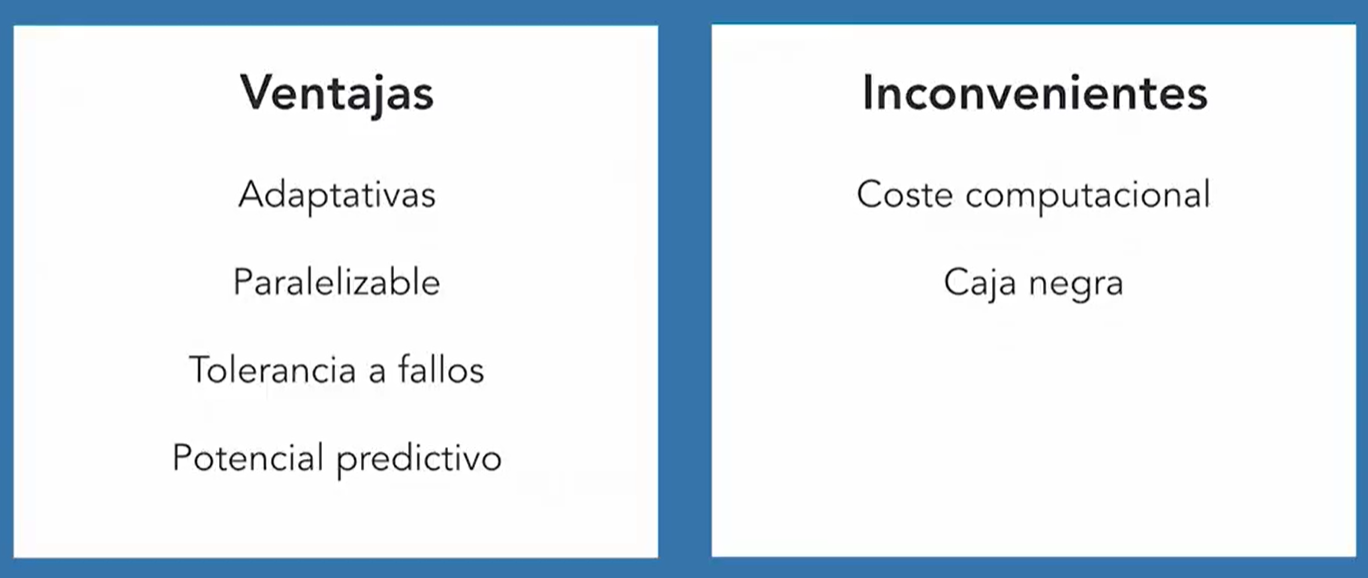

In [72]:
## Esta primera si tenemos datos categóricos.
from sklearn.neural_network import MLPClassifier
## Esta segunda si tenemos datos numéricos.
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [73]:
data = pd.read_csv("base_datos_2008.csv")

In [74]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay'])
df = df.sample(frac = 1).head(1000)

In [75]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
clf = MLPRegressor(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,))

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

R cuadrado:  0.958992003624623


# XGBoost y árboles de clasificación

In [81]:
# pip install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [82]:
data = pd.read_csv("base_datos_2008.csv")

In [83]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(10000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
model = XGBRegressor(n_jobs = -1, learning_rate = .5, max_depth = 2, colsample_bytree = 1, verbosity = 2, subsample = 1,
                     n_estimators = 500)
model.fit(X_train, y_train)

[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned

[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned

[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:47:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [87]:
predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

R cuadrado:  0.9452098721323602


# Seleccionar Variables en Machine Learning

A veces no es recomendable ajustar los modelos con todas las columnas del modelo de datos.

In [88]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

In [89]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [90]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay'])
df = df.sample(frac=1).head(1000)

In [91]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

# ¿Son necesarias todas estas variables? Veamos la importancia de las variables en el modelo.

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [92]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

# la columna P, se trata de los p-valores, indican lo relevante o no de cada variable en el modelo.
# Si el valor es 0 la respuesta es significativa, en caso contrario, la columna puede ser prescindible en el ajuste del modelo.

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3643.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        19:50:15   Log-Likelihood:                -3701.9
No. Observations:                1000   AIC:                             7424.
Df Residuals:                     990   BIC:                             7473.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.8811      1.291    -19.274   

In [93]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos DayOfWeek y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [94]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4102.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        19:52:18   Log-Likelihood:                -3702.0
No. Observations:                1000   AIC:                             7422.
Df Residuals:                     991   BIC:                             7466.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.6012      1.158    -21.247   

In [95]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos DayofMonth y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [96]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4690.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        19:52:21   Log-Likelihood:                -3702.3
No. Observations:                1000   AIC:                             7421.
Df Residuals:                     992   BIC:                             7460.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.1968      1.025    -23.600   

In [97]:
# Si cambiamos una variable, vemos cómo afecta al resto. Suprimimos Month y vemos cómo afecta al resto.

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [98]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     5474.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        19:52:29   Log-Likelihood:                -3702.6
No. Observations:                1000   AIC:                             7419.
Df Residuals:                     993   BIC:                             7454.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.6090      0.866    -28.430   

In [99]:
# Por último WeatherDelay

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit (X, Y)
predicciones = regr.predict(X)

In [23]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     6788.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:06:16   Log-Likelihood:                -3706.0
No. Observations:                1000   AIC:                             7424.
Df Residuals:                     994   BIC:                             7454.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5666      0.854    -28.756      0.0

Lo que estaba ocurriendo es que estábamos tratando las variables no numéricas como números... Por eso no eran relevantes.
Python estaba tratando estas variables como si el día 2 fuese el doble que el día 1,...
Se puede arreglar ajustando el modelo con dummies, de forma que no haya diferencia entre el mes 1 y el 10 por ejemplo.

# Selección automatizada de variables en Machine Learning

In [100]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
import pandas as pd

In [101]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [102]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay'])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()

In [103]:
# Detectaremos con linear_model.LinearRegression() cuáles son las variables más útiles.
selector = RFE(estimator = regr, n_features_to_select = 5)

# Entrenamos el objeto selector con nuestros datos
selector.fit(X, Y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [104]:
# Mostramos los resultados, con qué variables nos hemos quedado.
print(selector.ranking_)

[1 2 1 1 1 1 3]


In [105]:
# El resultado anterior nos da el ranking, pero no los nombres de las variables con las que nos hemos quedado.
X.columns[selector.support_]

Index(['AirTime', 'TaxiIn', 'TaxiOut', 'Month', 'DepDelay'], dtype='object')

In [106]:
# Modificamos a 1 el número de objetos con los que me quedo.
selector = RFE(estimator = regr, n_features_to_select = 1)
selector.fit(X,Y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [107]:
# Mostramos los resultados, con qué variables nos hemos quedado.
print(selector.ranking_)

[5 6 2 3 4 1 7]


In [108]:
# Ahora vemos cuál es la variable más relevante, la más correlacionada.
X.columns[selector.support_]

Index(['DepDelay'], dtype='object')

# Fundamentos de PCA (Principal Component Analysis)

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [110]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [111]:
# Con PCA comprimimos la variabilidad de las columnas que tenemos en menos columnas. Reducimos la dimensionalidad de matrices.
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']]

# Lo más importante es escalar las variables, ya que los pesos de cada una deben ser iguales (Distancia es mayor que retraso).
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [112]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [113]:
pca.components_

array([[ 0.45798893,  0.44898301,  0.14549082,  0.25536211,  0.49009789,
         0.5119444 ],
       [-0.52786131, -0.53705515, -0.04665176,  0.13497915,  0.44563014,
         0.46254969]])

In [114]:
print(np.round(pca.components_, 2))

[[ 0.46  0.45  0.15  0.26  0.49  0.51]
 [-0.53 -0.54 -0.05  0.13  0.45  0.46]]


'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'
El efecto que tiene la primera y segunda variable (creadas con PCA) sobre el resto de componentes.
Vemos qué porcentaje de varianza de los datos originales queda resumido en los dos componentes del array representado con PCA.

In [115]:
pca.explained_variance_ratio_

array([0.35893756, 0.31598345])

In [116]:
# El primer componente ocupa el 36 % de la variabilidad y el segundo un 31 %.
# Ahora visualizamos los resultados obtenidos.
nuevosvalores = pca.transform(X)

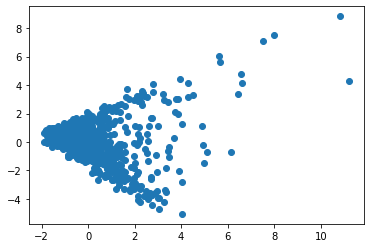

In [117]:
plt.scatter(nuevosvalores[:, 0], nuevosvalores[:, 1])

In [ ]:
# Vemos como se distribuyen los vuelos de la BD en este nuevo espacio, casi un 68 % de la variabilidad. Esto es útil para ahorro
# de memoria y visualizar resultados.

# Imputación de valores en Machine Learning

In [44]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import numpy as np
import pandas as pd

In [45]:
data = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")

In [47]:
df = data.sample(frac = 1).head(10000)
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay', 'CarrierDelay']]

In [48]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
2080475,123.0,814,5.0,29.0,-10.0,6.0,NaN
6843774,57.0,412,3.0,62.0,50.0,87.0,0.0
5526932,65.0,301,5.0,35.0,0.0,8.0,NaN
5640185,114.0,930,3.0,12.0,1.0,-25.0,NaN
3332397,81.0,508,7.0,8.0,-5.0,-12.0,NaN
...,...,...,...,...,...,...,...
1237267,59.0,361,4.0,7.0,7.0,2.0,NaN
3477569,142.0,988,4.0,27.0,3.0,21.0,0.0
4163228,120.0,866,7.0,11.0,15.0,6.0,NaN
1056303,310.0,2615,5.0,17.0,-5.0,-33.0,NaN


In [49]:
# En este caso tenemos muchos datos faltantes en la columna CarrierDelay
# Podemos en este caso obviarlo, o bien imputarle un valor, que escogeremos basándonos de cierta información.

# Vamos en un primer caso a proporcionar el valor medio y en segundo caso calcular el valor en función del resto de valores.
# En el primer caso, utilizando el valor medio estaremos subestimando la varianza, reducen la varianza de la columna, sin 
# incrementarla.

imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp.fit(X)

SimpleImputer()

In [50]:
X2 = imp.fit_transform(X)

In [51]:
pd.DataFrame(X2)
# los datos que faltaban tienen el valor medio.

,0,1,2,3,4,5,6
0,123.0,814.0,5.0,29.0,-10.0,6.0,14.806877
1,57.0,412.0,3.0,62.0,50.0,87.0,0.000000
2,65.0,301.0,5.0,35.0,0.0,8.0,14.806877
3,114.0,930.0,3.0,12.0,1.0,-25.0,14.806877
4,81.0,508.0,7.0,8.0,-5.0,-12.0,14.806877
...,...,...,...,...,...,...,...
9995,59.0,361.0,4.0,7.0,7.0,2.0,14.806877
9996,142.0,988.0,4.0,27.0,3.0,21.0,0.000000
9997,120.0,866.0,7.0,11.0,15.0,6.0,14.806877
9998,310.0,2615.0,5.0,17.0,-5.0,-33.0,14.806877


In [52]:
# Establezcamos una estructura de correlación en nuestra base de datos, en este caso es fácil, el retraso de salida y llegada.
X.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
AirTime,1.000000,0.982990,0.089035,0.104069,0.024081,0.029558,-0.001175
Distance,0.982990,1.000000,0.084108,0.091907,0.018522,-0.000842,0.001938
TaxiIn,0.089035,0.084108,1.000000,0.046598,0.016882,0.109480,-0.060247
TaxiOut,0.104069,0.091907,0.046598,1.000000,0.102122,0.314355,-0.088384
DepDelay,0.024081,0.018522,0.016882,0.102122,1.000000,0.933166,0.543552
ArrDelay,0.029558,-0.000842,0.109480,0.314355,0.933166,1.000000,0.522343
CarrierDelay,-0.001175,0.001938,-0.060247,-0.088384,0.543552,0.522343,1.000000


In [53]:
# Observamos que las filas que tienen mayor correlación con CarrierDelay son el retraso ArrDelay y DepDelay.
# Vamos a ajustar un modelo de regresión que prediga CarrierDelay en aquellos casos donde no tenemos valor, en función de
# ArrDelay y DepDelay.

X = X.dropna(subset = ["DepDelay", "ArrDelay"])
newX = X[["DepDelay", "ArrDelay", "CarrierDelay"]]
newX_train = newX[np.isnan(X.CarrierDelay) == False]

regr = linear_model.LinearRegression()
regr.fit(newX_train[["DepDelay", "ArrDelay"]], newX_train["CarrierDelay"])

LinearRegression()

In [54]:
regr.coef_

array([0.30260374, 0.07853638])

In [55]:
# Estoy recogiendo todas las columnas regresoras (DepDelay, ArrDelay) de aquellos vuelos que no tengan valor en CarrierDelay

valores_imputacion = newX[np.isnan(X.CarrierDelay)]
valores_imputacion = valores_imputacion[["DepDelay", "ArrDelay"]]

In [56]:
# Con estos datos, predeciremos los nuevos valores.
nuevos_valores = regr.predict(valores_imputacion)

In [57]:
# Ahora sustituyo aquellas columnas CarrierDelay que no tienen información, por el dato obtenido.
X.loc[np.isnan(X.CarrierDelay), "CarrierDelay"] = nuevos_valores

C:\Users\gabriel.marin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [58]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
2080475,123.0,814,5.0,29.0,-10.0,6.0,-7.132891
6843774,57.0,412,3.0,62.0,50.0,87.0,0.000000
5526932,65.0,301,5.0,35.0,0.0,8.0,-3.949781
5640185,114.0,930,3.0,12.0,1.0,-25.0,-6.238877
3332397,81.0,508,7.0,8.0,-5.0,-12.0,-7.033527
...,...,...,...,...,...,...,...
1237267,59.0,361,4.0,7.0,7.0,2.0,-2.302773
3477569,142.0,988,4.0,27.0,3.0,21.0,0.000000
4163228,120.0,866,7.0,11.0,15.0,6.0,0.432203
1056303,310.0,2615,5.0,17.0,-5.0,-33.0,-8.682791


# Text Mining

In [ ]:
# pip install nltk
# Utilizaremos el paquete nltk, habrá que instalarlo si no lo está, además de descargar nuevas funcionalidades mediante
# el método download.
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Para hacer pruebas utilizaremos este texto.
texto = open("../../data/Cap 8/textoANSI.txt", "r").read()

In [ ]:
# Partiremos nuestro texto en frases.
frases = sent_tokenize(texto)

In [ ]:
print(frases)

In [ ]:
# Ahora partimos el texto en palabras.
palabras = word_tokenize(texto)
print(palabras)

In [ ]:
# Para que no incluya signos de puntuación....
fdist = FreqDist(palabras)

In [ ]:
# Nos muestra las palabras más utilizadas en el texto. Si quiero analizar un texto, estas palabras aparecen en todos.
fdist.most_common(20)

In [ ]:
# Estamos viendo conjunciones, preposiciones, signos de puntuación... esto no sirve de nada para analizar un texto.
# Suprimiremos este tipo de palabras... mediante la función stopwords.words("spanish")

stop_word = stopwords.words("spanish")
print(stop_word)

In [ ]:
# Hemos obtenido el conjunto de palabras menos significativos.
# Extraemos toda esta lista de nuestro listado de palabras a analizar.
palabras2 = [x for x in palabras if x not in stop_word]
palabras2

In [ ]:
# Las comas siguen apareciendo, para ello, ajustamos el tipo de proceso.

palabras = word_tokenize(texto.lower())

In [ ]:
# string.punctuation son los símbolos de puntuación, los incluyo para que la lista tenga un significado concreto.
palabras2 = [x for x in palabras if x not in stop_word + list(string.punctuation)]
palabras2

In [ ]:
FreqDist(palabras2).most_common(20)

# Utilización de Stemmer para reducir palabras a la raíz

Cuando usuamos una función de estilo Stemmer es reducir las palabras a la raíz.

In [ ]:
import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

texto = open("../../data/Cap 8/textoANSI.txt", "r").read()
stop_words = stopwords.words("spanish")


In [ ]:
palabras = [x for x in word_tokenize(texto.lower()) if x not in stop_words + list(string.punctuation)]

In [ ]:
palabras

In [ ]:
# Vamos a reducir las conjugaciones de verbos / palabras a su raíz.

stemmer = SnowballStemmer("spanish")

In [ ]:
raices = []
for palabra in palabras:
    raices.append(stemmer.stem(palabra))

In [ ]:
raices

In [ ]:
# Esto nos permite que al hacer recuento de frecuencias no nos afecte las derivaciones de una determinada palabra.
FreqDist(raices).most_common(20)

In [ ]:
FreqDist(palabras).most_common(20)

# Traducciones de Texto con Google Translator

In [118]:
# pip install googletrans==3.1.0a0
from googletrans import Translator

In [119]:
translator = Translator()

In [120]:
print(translator.detect("Esto es un curso de Python"))

Detected(lang=es, confidence=1)


In [121]:
print(translator.detect("This es un curso de Python"))

Detected(lang=es, confidence=0.6530498)


In [122]:
# Vamos a ver cómo podemos traducir de forma sencilla.

print(translator.translate("Esto es un curso de Python"))

Translated(src=es, dest=en, text=This is a Python course, pronunciation=This is a Python course, extra_data="{'translat...")


In [123]:
peliculas = translator.translate(["Indiana Jones En busca del arca perdida", "Indiana Jones y El templo maldito","Indiana Jones y La última cruzada","El reino de la calavera de cristal"])

In [124]:
for pelicula in peliculas:
    print(pelicula.origin, "->", pelicula.text)

Indiana Jones En busca del arca perdida -> Indiana Jones Raiders of the Lost Ark
Indiana Jones y El templo maldito -> Indiana Jones and The Temple of Doom
Indiana Jones y La última cruzada -> Indiana Jones and The Last Crusade
El reino de la calavera de cristal -> The kingdom of the crystal skull


# Análisis de Sentimiento

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd

# He creado una lista de opiniones, la primera etiqueta si es positiva o negativa, la segunda las opiniones.

lista1 = ["Bueno", "Malo", "Malo", "Malo", "Bueno", "Bueno", "Malo", "Bueno", "Bueno", "Malo"]
lista2 = ["Lo recomendaría a todos mis amigos",
         "Es el peor producto que he comprado nunca",
         "Ni loco compraría este producto", 
         "No se lo recomendaría ni a mi enemigo", 
         "Es un buen producto, sí que lo recomendaría", 
         "Me ha encantado", 
         "Es una basura absoluta, ni me molesté en lavarlo, lo tiré directamente",
         "El enemigo público número uno de la suciedad",
         "Es un producto genial, se lo recomendaría a todos los compradores",
         "Hay que estar loco para comprar esta basura"]

df = pd.DataFrame({"Sentimiento":lista1, "Valoracion":lista2 })

# Preparamos el objeto modelación para realizar un modelo.

# Quitamos del modelo todo aquello que no sean letras en minúscula ni mayúscula ni números.
# Con ngram_range (1,2) se indican parejas de palabras, p.e. enemigo público es pareja de palabras... dependiendo del contexto
# puede ser positivo o negativo.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# ngram_range si pongo (1,1) indico solo que quiero las palabras; si pongo (1,2) incluye parejas de palabras 
# (p.e.enemigo público)... podemos indicar las secuencias de palabras que queramos.
# Podemos ver qué pasa con la escucha de tweets...
cv = CountVectorizer(lowercase = True, ngram_range = (1,2), tokenizer = token.tokenize)
# Vamos a decirle que entrene la columna de valoración
text_counts = cv.fit_transform(df['Valoracion'])

In [2]:
# Obtenemos el número de palabras y pareja de palabras, contando cuántas veces aparecen. En este caso, como 
# el número de texto es pequeño solo encontramos las parejas de palabras una vez. Todo esto nos ayudará a obtener un 
# modelo predictivo, que veremos a continuación... interesantísimo para clasificación de tweets.
print(text_counts)

  (0, 54)	1
  (0, 96)	1
  (0, 0)	2
  (0, 105)	1
  (0, 69)	1
  (0, 8)	1
  (0, 55)	1
  (0, 97)	1
  (0, 1)	1
  (0, 5)	1
  (0, 107)	1
  (0, 70)	1
  (1, 32)	1
  (1, 24)	1
  (1, 86)	1
  (1, 88)	1
  (1, 92)	1
  (1, 48)	1
  (1, 15)	1
  (1, 81)	1
  (1, 33)	1
  (1, 26)	1
  (1, 87)	1
  (1, 90)	1
  (1, 94)	1
  :	:
  (8, 108)	1
  (8, 34)	1
  (8, 42)	1
  (8, 60)	1
  (8, 17)	1
  (8, 110)	1
  (8, 89)	1
  (8, 43)	1
  (8, 106)	1
  (8, 61)	1
  (9, 92)	1
  (9, 57)	1
  (9, 18)	1
  (9, 9)	1
  (9, 46)	1
  (9, 38)	1
  (9, 84)	1
  (9, 36)	1
  (9, 47)	1
  (9, 93)	1
  (9, 39)	1
  (9, 59)	1
  (9, 85)	1
  (9, 20)	1
  (9, 37)	1


In [3]:
# Crearemos una muestra de train y test para analizar cómo es de acertado el modelo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentimiento'], test_size = 0.5, random_state = 1)

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8


In [5]:
y_test

2     Malo
9     Malo
6     Malo
4    Bueno
0    Bueno
Name: Sentimiento, dtype: object

In [6]:
predicted

array(['Malo', 'Malo', 'Malo', 'Malo', 'Bueno'], dtype='<U5')

In [7]:
# Idea para práctica -- Hacer lo mismo con tweets, aplicando un modelo.

# Web Scraping

In [ ]:
# Entrar en la url https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 

In [ ]:
# pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

# Elementos anidados.
print(soup.prettify())

In [ ]:
# Elementos sin anidar.
list(soup.children)

In [ ]:
soup.title

In [ ]:
soup.title.parent

In [ ]:
for child in soup.title.children:
    print(child)

In [ ]:
# Busca la primera vez que encuentra a
soup.a

In [ ]:
soup.find_all("a")

In [ ]:
# Si buscamos por p, tendremos el texto, interesante para hacer un análisis de text mining.
soup.find_all("p")

In [ ]:
soup.find(id = "Enlaces_externos")

In [ ]:
enlaces = soup.find(id = "Enlaces_externos")

In [ ]:
enlaces

In [ ]:
enlaces.contents

In [ ]:
enlaces = soup.findAll("div", {'class': 'listaref'})

In [ ]:
# Obtenemos los enlaces, pero existe demasiado código.
enlaces

In [ ]:
soup.find_all("li")

In [ ]:
# Obtenemos los enlaces que estaban escritos.
for d in soup.find('div', attrs = {'class': 'listaref'}).descendants:
    if d.name == 'span' and d.get('class', '') == ['reference-text']:
        print(d.text)

In [ ]:
data = soup.find('div', attrs = {'class': 'listaref'})
for div in data:
    links = div.findAll('a')
    for a in links:
        if a['href'].startswith("http"):
            print(a["href"])

# Extracción de Texto usando BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

# Elementos anidados.
print(soup.prettify())

In [ ]:
# Con esta función se recoge texto, pero incorpora cosas que no nos interesa.
print(soup.get_text())

In [ ]:
# Si queremos visualizar el cuerpo del artículo, podemos hacerlo de la siguiente forma
soup.find("body")

In [ ]:
# De esta forma podríamos buscar los elementos categorizados por ejemplo con p
soup.find("body").find_all('p')

In [ ]:
# La información está pendiente de procesar para obtenerla limpia.
elementos = soup.find("body").find_all('p')

In [ ]:
elementos

In [ ]:
# Ahora disponemos de una lista con los elementos separados por párrafos.
# Vamos a utilizar una función para limpiar todo el código html

import re

def limpiarhtml(html):
    expresion = re.compile('<.*?>')
    texto = re.sub(expresion, '', html)
    return texto

In [ ]:
for elem in elementos:
    print(limpiarhtml(str(elem)))

# Obtención de Información no Contextual

In [ ]:
from bs4 import BeautifulSoup
import requests, re

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

In [ ]:
# Obtenemos todos los enlaces que apuntan fuera de la Wikipedia.
for link in soup.findAll('a', attrs = {'href': re.compile("^http://")}):
    print(link.get('href'))

In [ ]:
# Buscamos ahora todos los enlaces que apuntan dentro de la Wikipedia.
baselink = "https://es.wikipedia.org"

for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/":
        print(baselink + link.get('href'))

In [ ]:
# En algún caso nos dirige a una doble barra, p.e. https://es.wikipedia.org//wikimediafoundation.org/wiki/Terms_of_Use

baselink = "https://es.wikipedia.org"
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/":
        print(baselink + link.get('href'))

# Creación de un Spider o Crawler

In [ ]:
from bs4 import BeautifulSoup
import requests, re, time

url = "https://es.wikipedia.org/wiki/Python"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, 'html.parser')

listalinksexplorados = set()
listalinksexplorar = set()

baselink = "https://es.wikipedia.org"
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/":
        print(baselink + link.get('href'))

In [ ]:
# Añadimos la lista de links por explorar.
for link in soup.findAll('a'):
    if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/" and baselink + link.get('href') not in listalinksexplorados:
        listalinksexplorar.add(baselink + link.get('href'))

In [ ]:
listalinksexplorar

In [ ]:
while (len(listalinksexplorar) != 0):
    link = listalinksexplorar.pop()
    pagina = requests.get(link)
    soup = BeautifulSoup(pagina.content, "html.parser")
    print("Links Explorados: ", len(listalinksexplorados), "Links por Explorar: ", len(listalinksexplorar))
    listalinksexplorados.add(link)
    time.sleep(1)
    for link in soup.findAll('a'):
        if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/" and baselink + link.get('href') not in listalinksexplorados:
            listalinksexplorar.add(baselink + link.get('href'))

In [ ]:
listalinksexplorados

In [ ]:
# Podríamos utilizar un modelo de Text Mining y encontrar la información navegando a través de links.

# Desafío: WebScraping y Modelización

In [ ]:
# Hacer un Web Scraping para la tabla de "Países de América Latina por índice de desarrollo humano"
# https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_de_Am%C3%A9rica_Latina_por_%C3%ADndice_de_desarrollo_humano 

# 1 - Conseguir la lista de países, incluyendo la media general y las columnas que se muestran.
# 2 - Ajustar luego un modelo de Machine Learning con los valores, intentando que el código sea reproducible si se añaden
# nuevos años.
# 3 - Hacer un modelo de predicción de un valor basándonos en los tres anteriores.
# 4 - Predecir el valor del año siguiente (no se muestra) a partir del conjunto de valores de la lista.

In [ ]:
# Detectamos donde se encuentra la tabla y los nombres de cada columna.
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn import linear_model
from bs4 import BeautifulSoup

import requests, re, time
import pandas as pd
import numpy as np


url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_de_Am%C3%A9rica_Latina_por_%C3%ADndice_de_desarrollo_humano"
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content, "html.parser")

In [ ]:
tablas = soup.findAll("table")
for tabla in tablas:
    if (tabla["class"] == "wikitable"):
        print(tabla)

In [ ]:
print(tabla)

In [ ]:
nombrecolumnas = []
for elem in tabla.find_all("th"):
    if str(elem.string)[0] == "2" or str(elem.string)[0] == "1":
        nombrecolumnas.append(elem.string[:-1])
        print(elem.string[:-1])

In [ ]:
print(nombrecolumnas)

In [ ]:
for elem in tabla.find_all("td"):
    if str(elem.string)[0] == "0":
        print(elem.string)

In [ ]:
paises = []
for elem in tabla.find_all(["td", "img"]):
    if str(elem.string).find("Latino América") != -1:
        print(elem.string)
        paises.append(elem.string)
    if elem.img is not None:
        print(elem.find_next("a").string)
        paises.append(elem.string)

In [ ]:
len(paises)

In [ ]:
valores = []
# Se elimina la última posición [:-1] que corresponde con un salto de línea y se reemplazan todas las comas por puntos.
for elem in tabla.find_all("td"):
    if str(elem.string)[0] == "0":
        if float(elem.string[:-1].replace(",",".")) > 0.4:
            valores.append(float(elem.string[:-1].replace(",",".")))

In [ ]:
valores = np.array(valores)

In [ ]:
len(valores)

In [ ]:
print(valores)

In [ ]:
# Le damos un formato de BBDD
valores.shape = (len(paises), len(nombrecolumnas))

In [ ]:
valores

In [ ]:
df = pd.DataFrame(valores, columns = nombrecolumnas)

In [ ]:
df

In [ ]:
# A continuación se crean todas las variables regresoras, todas las columnas menos la primera
X = df.iloc[:,1:len(df.columns)]
# Y la respuesta es la primera
Y = df.iloc[:,0]

In [ ]:
# Ajustamos un modelo con 7 particiones, en un modelo de regresión lineal.
kf = KFold(n_splits = 7)
kf.get_n_splits(X)

regr = linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))

print("R2 medio: ", np.mean(resultados))


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

In [ ]:
r2_score(Y, regr.predict(X))

In [ ]:
regr.coef_

In [ ]:
regr.intercept_

In [ ]:
# Modelo predictivo para el año 2019
np.sum(df.iloc[:,0:6] * regr.coef_, axis = 1)